
# Example usage

To use `numerical_function_spaces` in a project:


In [1]:
import decimal as dc

import numpy as np

import numerical_function_spaces.orlicz_spaces as osm


Define $x$ as simple function $x(t)=\sum_{i=0}^{len\_t - 1} a_i \chi_{A_i}(t)$ as two rows numpy array, where first row is for $a_i$ and second is for $\mu(A_i)$ 

In [2]:
# constant function
len_t = 1
x_1 = np.zeros(shape=(2, len_t))
x_1[1, 0] = 2  #  measure of support
x_1[0, 0] = 1  # value

# support with infinite measure support
len_t = 1
x_2 = np.zeros(shape=(2, len_t))
x_2[1, 0] = np.inf  #  measure of support
x_2[0, 0] = 1  # value

len_t = 5  # 
x_3 = np.zeros(shape=(2, len_t))
for i in range(len_t):
    x_3[1, i] = i + 1  #  measure of supports
    x_3[0, i] = 1 / (i + 1)  # values

t_max = 2 * np.pi
len_t = 1000
x_4 = np.zeros(shape=(2, len_t))
x_4[1, :] = t_max / len_t  # measure of supports
for i in range(len_t):
    arg = t_max / len_t * i
    if arg <= 3:
        x_4[0, i] = np.sin(arg)  # values


Define Orlicz function

In [2]:
def Orlicz_function(u):
    return np.where(u <= 1, u, np.inf)

example of using kappa() function

In [4]:
osm.kappa(Orlicz_function, x=x_1, k=1, p_norm=1)

np.float64(3.0)

In [5]:
%%timeit
osm.kappa(Orlicz_function, x=x_1, k=1, p_norm=1)

47 μs ± 4.9 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


example of using p_Amemiya_norm() function 

In [6]:
osm.p_Amemiya_norm(Orlicz_function, x=x_1, p_norm=1)

np.float64(3.0)

In [7]:
%%timeit
osm.p_Amemiya_norm(Orlicz_function, x=x_1, p_norm=1)

19.6 ms ± 3.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


100%|██████████| 45/45 [00:00<00:00, 48.04it/s]


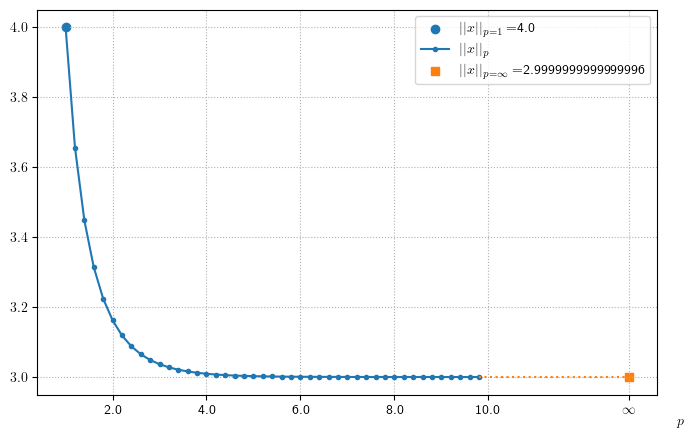

In [5]:
x = np.array([[1], [3]])
osm.plot_p_norms(Orlicz_function,
                 x=x,
                 p_min=1,
                 p_max=10,
                 dp=.2,
                 attach_inf=True,
                 figsize=(8,5),
                 show_progress=True)

example of using p_Amemiya_norm_with_stars() function

In [8]:
osm.p_Amemiya_norm_with_stars(Orlicz_function, x=x_1, p_norm=1)

(np.float64(3.000110995691083),
 np.float64(0.9998890166275929),
 np.float64(0.9998890166275929))

In [9]:
%%timeit
osm.p_Amemiya_norm_with_stars(Orlicz_function, x=x_1, p_norm=1)

300 ms ± 23 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


example of using p_Amemiya_norm_with_stars() function with additional parameters

In [10]:
osm.p_Amemiya_norm_with_stars(Orlicz_function, x=x_1, p_norm=1,
                              k_min=0.9,
                              k_max=1.1,
                              len_domain_k=100000,)
                              # show_progress=True)

(np.float64(3.0000000000026756),
 np.float64(0.9999999999973245),
 np.float64(0.9999999999973245))

In [11]:
%%timeit
osm.p_Amemiya_norm_with_stars(Orlicz_function, x=x_1, p_norm=1, k_min=0.9, k_max=1.1, len_domain_k=1000)

53 ms ± 2.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


example of using p_Amemiya_norm_with_stars_by_decimal() function

In [12]:
print(dc.getcontext().prec)
print(dc.Decimal(0.2))
print(dc.Decimal('0.2'))
print(dc.Decimal(1) / 5)
print((dc.Decimal(np.sqrt(2)))**2)
print((dc.Decimal(2).sqrt())**2)

dc.getcontext().prec = 50
print(dc.Decimal(0.2))
print(dc.Decimal('0.2'))
print(dc.Decimal(1) / 5)
print((dc.Decimal(np.sqrt(2)))**2)
print((dc.Decimal(2).sqrt())**2)

28
0.200000000000000011102230246251565404236316680908203125
0.2
0.2
2.000000000000000273432346306
1.999999999999999999999999999
0.200000000000000011102230246251565404236316680908203125
0.2
0.2
2.0000000000000002734323463064769280688491650795723
1.9999999999999999999999999999999999999999999999999


Orlicz function and x must be prepared to decimal form

In [13]:
def Orlicz_function(u):
    return np.where(u <= 1, u, dc.Decimal(np.inf))
len_t = 1
x_5 = np.zeros(shape=(2, len_t), dtype=np.dtype('object'))
x_5[1, 0] = dc.Decimal(2)  #  measure of support
x_5[0, 0] = dc.Decimal(1)  # value
osm.p_Amemiya_norm_with_stars_by_decimal(Orlicz_function, x=x_5, p_norm=1)

(Decimal('3.1110988766779245797415719566910102134319832100514'),
 Decimal('0.90000991'),
 Decimal('0.90000991'),
 array([Decimal('0.00001'), Decimal('0.10000999'), Decimal('0.20000998'),
        Decimal('0.30000997'), Decimal('0.40000996'),
        Decimal('0.50000995'), Decimal('0.60000994'),
        Decimal('0.70000993'), Decimal('0.80000992'),
        Decimal('0.90000991'), Decimal('1.00000990'),
        Decimal('1.10000989'), Decimal('1.20000988'),
        Decimal('1.30000987'), Decimal('1.40000986'),
        Decimal('1.50000985'), Decimal('1.60000984'),
        Decimal('1.70000983'), Decimal('1.80000982'),
        Decimal('1.90000981'), Decimal('2.00000980'),
        Decimal('2.10000979'), Decimal('2.20000978'),
        Decimal('2.30000977'), Decimal('2.40000976'),
        Decimal('2.50000975'), Decimal('2.60000974'),
        Decimal('2.70000973'), Decimal('2.80000972'),
        Decimal('2.90000971'), Decimal('3.00000970'),
        Decimal('3.10000969'), Decimal('3.20000968'),
   

In [14]:
%%timeit
osm.p_Amemiya_norm_with_stars_by_decimal(Orlicz_function, x=x_5, p_norm=1)

64.6 ms ± 4.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


example of using p_Amemiya_norm_with_stars_by_decimal() function with additional parameters

In [15]:
osm.p_Amemiya_norm_with_stars_by_decimal(Orlicz_function, x=x_5, p_norm=dc.Decimal(1),
                                         k_min=dc.Decimal('0.9'),
                                         k_max=dc.Decimal('1.1'),
                                         len_domain_k=10000, )
                                         # show_progress=True)

(Decimal('3.00000'),
 Decimal('1.00000'),
 Decimal('1.00000'),
 array([Decimal('0.9'), Decimal('0.90002'), Decimal('0.90004'), ...,
        Decimal('1.09994'), Decimal('1.09996'), Decimal('1.09998')],
       dtype=object),
 array([Decimal('3.1111111111111111111111111111111111111111111111111'),
        Decimal('3.1110864203017710717539610230883758138708028710473'),
        Decimal('3.1110617305897515665970401315497089018265854850897'),
        ..., Decimal('Infinity'), Decimal('Infinity'), Decimal('Infinity')],
       dtype=object))

In [16]:
%%timeit
osm.p_Amemiya_norm_with_stars_by_decimal(Orlicz_function, x=x_5, p_norm=dc.Decimal(1),
                                         k_min=dc.Decimal('0.9'),
                                         k_max=dc.Decimal('1.1'),
                                         len_domain_k=1000
                                         )

61.9 ms ± 1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In the next example there is false $k_p^{*}(x)$ less than $k_p^{**}(x)$

In [17]:
def Orlicz_function(u):
    return np.where(u <=1, u, 2 * u - 1)

x = np.array([[1],[3]])


In [18]:
osm.p_Amemiya_norm_with_stars(Orlicz_function, x=x, p_norm=20)

(np.float64(3.0000000000430616),
 np.float64(0.64823266269593),
 np.float64(0.9999516967001615))

In [19]:
osm.p_Amemiya_norm_with_stars_by_decimal(Orlicz_function, x=x, p_norm=dc.Decimal(10))

(Decimal('3.0000145688845555222000227125563249652936039015189'),
 Decimal('0.90000991'),
 Decimal('0.90000991'),
 array([Decimal('0.00001'), Decimal('0.10000999'), Decimal('0.20000998'),
        Decimal('0.30000997'), Decimal('0.40000996'),
        Decimal('0.50000995'), Decimal('0.60000994'),
        Decimal('0.70000993'), Decimal('0.80000992'),
        Decimal('0.90000991'), Decimal('1.00000990'),
        Decimal('1.10000989'), Decimal('1.20000988'),
        Decimal('1.30000987'), Decimal('1.40000986'),
        Decimal('1.50000985'), Decimal('1.60000984'),
        Decimal('1.70000983'), Decimal('1.80000982'),
        Decimal('1.90000981'), Decimal('2.00000980'),
        Decimal('2.10000979'), Decimal('2.20000978'),
        Decimal('2.30000977'), Decimal('2.40000976'),
        Decimal('2.50000975'), Decimal('2.60000974'),
        Decimal('2.70000973'), Decimal('2.80000972'),
        Decimal('2.90000971'), Decimal('3.00000970'),
        Decimal('3.10000969'), Decimal('3.20000968'),
   

For better accuracy we may reduce domain by

In [20]:
osm.p_Amemiya_norm_with_stars(Orlicz_function, x=x, p_norm=20,
                              k_min=0.45,
                              k_max=1.05)

(np.float64(3.0000000000433653),
 np.float64(0.6671999999999962),
 np.float64(0.9995999999999903))

In [21]:
osm.p_Amemiya_norm_with_stars_by_decimal(Orlicz_function, x=x, p_norm=dc.Decimal(10),
                                         k_min=dc.Decimal(45)/100,
                                         k_max=dc.Decimal(105)/100)

k_star_star is equal to k_max: try larger k_max


(Decimal('3.0000050804876253224732233778977489155742356587800'),
 Decimal('1.0'),
 Decimal('1.0'),
 array([Decimal('0.5'), Decimal('1.0')], dtype=object),
 array([Decimal('3.0051623009650627396458999333035141391582722454466'),
        Decimal('3.0000050804876253224732233778977489155742356587800')],
       dtype=object))